<a href="https://colab.research.google.com/github/harshrajput9934/SPAM-MAIL-PREDICTION/blob/main/SPAM_MAIL_PREDICTION_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Importing all the important library**

In [90]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from sklearn.metrics import accuracy_score,precision_score

**Importing the dataset**

In [91]:
df=pd.read_csv('/content/mail_data.csv')

In [92]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


**Data Cleaning**

In [93]:
df.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [94]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [95]:
#labelling the ham amd spam
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [96]:
df['Category']=encoder.fit_transform(df['Category'])

In [97]:
df.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [98]:
##checking the missing value
df.isnull().sum()

Category    0
Message     0
dtype: int64

In [99]:
#checking the duplicate value
df.duplicated().sum()

415

In [100]:
#removing the duplicate value
df=df.drop_duplicates(keep='first')

In [101]:
df.duplicated().sum()

0

In [102]:
df.shape


(5157, 2)

**Data Analysis**





In [103]:
df['Category'].value_counts()

0    4516
1     641
Name: Category, dtype: int64

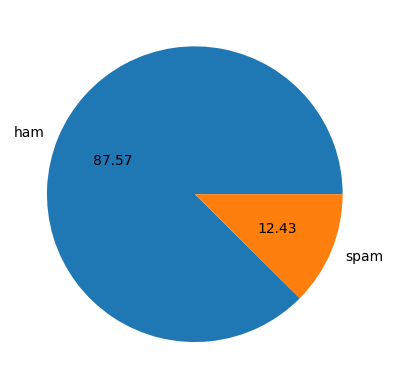

In [104]:
import matplotlib.pyplot as plt
plt.pie(df['Category'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

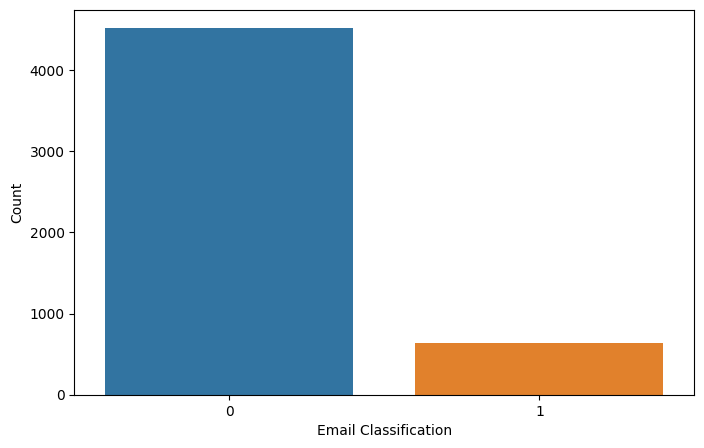

In [105]:
import seaborn as sns
plt.figure(figsize=(8,5))
sns.countplot(x='Category', data=df)
plt.xlabel('Email Classification')
plt.ylabel('Count')
plt.show()

In [106]:
#we are doing deeper analysis
import nltk

nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [107]:
df['num_characters'] = df['Message'].apply(len)


In [108]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [109]:

df['num_words'] = df['Message'].apply(lambda x:len(nltk.word_tokenize(x)))
df.head()


,Category,Message,num_characters,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,24
1,0,Ok lar... Joking wif u oni...,29,8
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37
3,0,U dun say so early hor... U c already then say...,49,13
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15


In [110]:
df['num_sentences'] = df['Message'].apply(lambda x:len(nltk.sent_tokenize(x)))
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


In [111]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5157.000000,5157.000000,5157.000000
mean,79.103936,18.560403,1.969750
std,58.382922,13.405970,1.455526
min,2.000000,1.000000,1.000000
25%,36.000000,9.000000,1.000000
50%,61.000000,15.000000,1.000000
75%,118.000000,26.000000,2.000000
max,910.000000,220.000000,38.000000


In [112]:
# ham
df[df['Category'] == 0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.869353,17.267715,1.827724
std,56.708301,13.588065,1.394338
min,2.000000,1.000000,1.000000
25%,34.000000,8.000000,1.000000
50%,53.000000,13.000000,1.000000
75%,91.000000,22.000000,2.000000
max,910.000000,220.000000,38.000000


In [113]:
#spam
df[df['Category'] == 1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,641.000000,641.000000,641.000000
mean,137.118565,27.667707,2.970359
std,30.399707,7.103501,1.485575
min,7.000000,2.000000,1.000000
25%,130.000000,25.000000,2.000000
50%,148.000000,29.000000,3.000000
75%,157.000000,32.000000,4.000000
max,223.000000,46.000000,9.000000


<ipython-input-114-8df7bcac526d>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(),annot=True)


<Axes: >

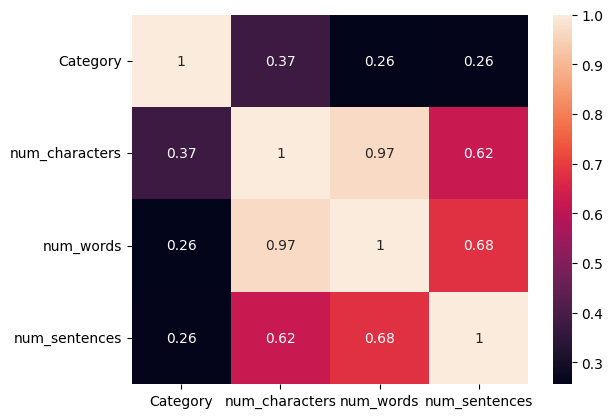

In [114]:
sns.heatmap(df.corr(),annot=True)

**Text preprocessing**

    

In [115]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)

    y = []
    for i in text:
        if i.isalnum():
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)

    text = y[:]
    y.clear()

    for i in text:
        y.append(ps.stem(i))


    return " ".join(y)





In [116]:
from nltk.corpus import stopwords


import string
nltk.download('stopwords')
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('playing')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


'play'

In [117]:
df['transformed_text'] = df['Message'].apply(transform_text)
df.head()

,Category,Message,num_characters,num_words,num_sentences,transformed_text
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2,go jurong point crazi avail bugi n great world...
1,0,Ok lar... Joking wif u oni...,29,8,2,ok lar joke wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2,free entri 2 wkli comp win fa cup final tkt 21...
3,0,U dun say so early hor... U c already then say...,49,13,1,u dun say earli hor u c alreadi say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1,nah think goe usf live around though


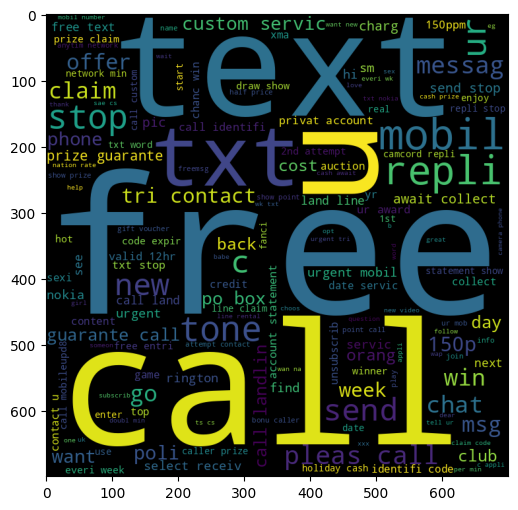

In [118]:
from wordcloud import WordCloud
wc = WordCloud(width=700,height=700,min_font_size=10,background_color='black')
spam_wc = wc.generate(df[df['Category'] == 1]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(spam_wc)



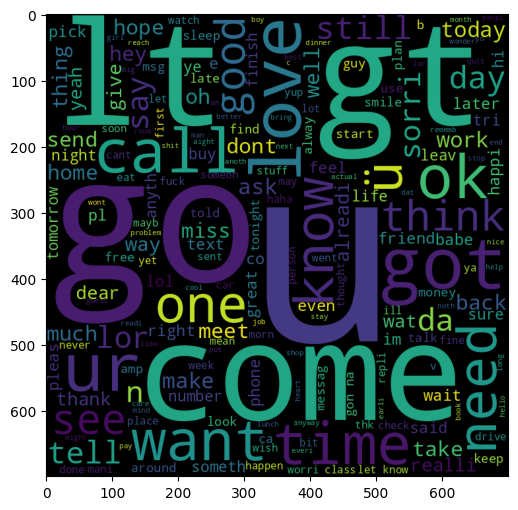

In [119]:
ham_wc = wc.generate(df[df['Category'] == 0]['transformed_text'].str.cat(sep=" "))
plt.figure(figsize=(20,6))
plt.imshow(ham_wc)

**MODEL BUILDING**

In [120]:
##ML model requires numerical input,but here message column is not numerical,so we have to transform it into numerical form.
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [121]:
X.shape

(5157, 3000)

In [122]:
y = df['Category'].values

In [123]:
print(y)

[0 0 1 ... 0 0 0]


In [124]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)
model = MultinomialNB()


In [125]:
model.fit(X_train,y_train)



MultinomialNB()

In [126]:
# prediction on training data
prediction_on_training_data = model.predict(X_train)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)
precision_on_training_data = precision_score(y_train, prediction_on_training_data)
print('Accuracy on training data : ', accuracy_on_training_data)
print('precision on training data : ', precision_on_training_data)

Accuracy on training data :  0.9781818181818182
precision on training data :  0.9976525821596244


In [127]:
# prediction on test data
prediction_on_test_data = model.predict(X_test)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)
precision_on_test_data = precision_score(y_test, prediction_on_test_data)
print('Accuracy on test data : ', accuracy_on_test_data)
print('precision on test data : ', precision_on_test_data)


Accuracy on test data :  0.9709302325581395
precision on test data :  1.0


**Making the predictive system**

In [128]:
def predict(input):

    transformed_sns=transform_text(input)

    vector_input=tfidf.transform([transformed_sns])
    ans=model.predict(vector_input)[0]

    if ans==1:
      print("Wait a minute, this is a SPAM!")
    else:
      print("This is a normal message, the mail is HAM")




In [129]:
predict("URGENT! You have won a 1 week FREE membership in our £100,000 Prize Jackpot! Txt the word: CLAIM to No: 81010 T&C www.dbuk.net LCCLTD POBOX 4403LDNW1A7RW18")

Wait a minute, this is a SPAM!


In [130]:
predict("ve been searching for the right words to thank you for this breather. I promise i wont take your help for granted and will fulfil my promise. You have been wonderful and a blessing at all times.")

This is a normal message, the mail is HAM


In [131]:
predict("Update_Now - Xmas Offer! Latest Motorola, SonyEricsson & Nokia & FREE Bluetooth! Double Mins & 1000 Txt on Orange. Call MobileUpd8 on 08000839402 or call2optout/F4Q=")

Wait a minute, this is a SPAM!


In [132]:
predict("Yup... Ok i go home look at the timings then i msg ü again... Xuhui going to learn on 2nd may too but her lesson is at 8am")

This is a normal message, the mail is HAM


In [133]:
predict("Thanks for your subscription to Ringtone UK your mobile will be charged £5/month Please confirm by replying YES or NO. If you reply NO you will not be charged ")

Wait a minute, this is a SPAM!
